### <Center> **Clustering and PCA** </Center> 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import skfuzzy as fuzz

import warnings
warnings.filterwarnings("ignore")

# Встановлю стиль графіків
sns.set_theme(style='whitegrid', context='notebook')

---

## <Center> **Завантаження та обробка даних** </Center> 

#### &#10140; *Читання даних*</br>

In [ ]:
print(os.path.exists("D:\PROGRAMMING\ItStep\TOI\Lab-2\possum.csv"))

data = pd.read_csv("possum.csv")

print("Розмір даних:", data.shape)
display(data.head())

True
Розмір даних: (104, 14)


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### &#10140;  *Очищення даних*</br>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


##### Видаляю колонку "case", яка не несе собою важливої інформації

In [ ]:
data.drop(columns=["case"], inplace=True)

#### <div class="alert alert-info"> **Unique Data and Outliers** </div>

In [ ]:
data.nunique()

site         7
Pop          2
sex          2
age          9
hdlngth     71
skullw      64
totlngth    34
taill       19
footlgth    75
earconch    69
eye         35
chest       19
belly       24
dtype: int64

In [ ]:
data.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data[col].quantile(0.25)      # перший квартиль
    Q3 = data[col].quantile(0.75)      # третій квартиль
    IQR = Q3 - Q1                      # міжквартильний розмах

    # Границі:
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Знаходимо викиди:
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    # print(f"🔍 Викиди у колонці '{col}': {len(outliers)} записів")

    # Якщо хочеш побачити самі рядки — розкоментуй нижній рядок:
    #display(outliers[[col]])

# plt.figure(figsize=(10, 5))
# sns.boxplot(x=data['hdlngth'])  # заміни на будь-яку колонку
# plt.title("Boxplot for footlgth")
# plt.show()


#### <div class="alert alert-info"> **Null Data** </div>

In [ ]:
missing = []

for x in data.columns:
    null_count = data[x].isnull().sum()
    if null_count != 0:
        print(f"{x} has {null_count} null values.")
        missing.append(x)
    else:
        print(f"{x} doesn't have null data!")


site doesn't have null data!
Pop doesn't have null data!
sex doesn't have null data!
age has 2 null values.
hdlngth doesn't have null data!
skullw doesn't have null data!
totlngth doesn't have null data!
taill doesn't have null data!
footlgth has 1 null values.
earconch doesn't have null data!
eye doesn't have null data!
chest doesn't have null data!
belly doesn't have null data!


##### Колонки "age" та "footlgth" мають пропущені значення. Заповнюю їх по медіані.

In [ ]:
data = data.fillna(data.median(numeric_only=True))


#### <div class="alert alert-info"> **Категоризація** </div>

##### ***колонка - "Pop"  (Label Encoding)***

In [ ]:
unique_values = data['Pop'].unique()
print("Унікальні значення в колонці 'Pop':")
print(unique_values)

edu_map = {
    "Vic" : 0,
    "other" : 1
}
data["Pop"] = data["Pop"].map(edu_map)

Унікальні значення в колонці 'Pop':
['Vic' 'other']


##### ***колонка - "Sex"  (Label Encoding)***

In [ ]:
unique_values = data['sex'].unique()
print("Унікальні значення в колонці 'sex':")
print(unique_values)

edu_map = {
    "m" : 0,
    "f" : 1
}
data["sex"] = data["sex"].map(edu_map)
data.head(5)

Унікальні значення в колонці 'sex':
['m' 'f']


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### &#10140; *Стандартизація*</br>

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

---

## <Center> **Кластеризація у вихідному просторі (без зменшення розмірності)** </Center> 

#### &#10140; *K-means*</br>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans_original = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(data_scaled)
centroids_original = kmeans_original.cluster_centers_

sil_score_kmeans = silhouette_score(data_scaled, labels_original)
db_score_kmeans = davies_bouldin_score(data_scaled, labels_original)
ch_score_kmeans = calinski_harabasz_score(data_scaled, labels_original)

unique_labels, counts = np.unique(labels_original, return_counts=True)
print("Розподіл об'єктів за кластерами:")
for i, count in zip(unique_labels, counts): 
    print(f"Кластер {i+1}: {count} об'єктів")

print(f"\nSilhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans:.3f}")

Розподіл об'єктів за кластерами:
Кластер 1: 59 об'єктів
Кластер 2: 45 об'єктів

Silhouette Score: 0.267
Davies-Bouldin Index: 1.521
Calinski-Harabasz Index: 38.577


  File "C:\Users\oliar\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\

#### &#10140; *Fuzzy C-Means*</br>

In [ ]:
n_clusters = 2
X = data_scaled.T

cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None, seed=42
)

labels_hard = np.argmax(u, axis=0)

X_normal = X.T

def xie_beni_index(X, u, centers, m):
    N = X.shape[0]
    c = centers.shape[0]
    # 1. Обчислення чисельника: розмитість + розсіювання
    num = 0
    for i in range(c):
        for j in range(N):
            num += (u[i, j] ** m) * np.linalg.norm(X[j] - centers[i]) ** 2
    # 2. Обчислення мінімальної відстані між центрами
    min_dist = np.min([
        np.linalg.norm(centers[i] - centers[k]) ** 2
        for i in range(c) for k in range(c) if i != k
    ])
    # 3. Повертаємо індекс
    return num / (N * min_dist)


# Отримання матриці приналежності
fuzzy_membership_matrix = u.T 
print("Матриця приналежності (перші 5 об'єктів):")
print(pd.DataFrame(fuzzy_membership_matrix[:5], columns=[f'Кластер {i+1}' for i in range(n_clusters)]))

cluster_labels = np.argmax(fuzzy_membership_matrix, axis=1)

unique_labels, counts = np.unique(cluster_labels, return_counts=True)
print("\nРозподіл об'єктів за кластерами:")
for i, count in zip(unique_labels, counts): 
    print(f"Кластер {i+1}: {count} об'єктів")

sil_score_fuzzy = silhouette_score(X_normal, labels_hard)
xie_beni_fuzzy = xie_beni_index(X_normal.values, u, cntr, m=2)

print(f"\nSilhouette Score: {sil_score_fuzzy:.3f}")
print(f"Xie Beni index: {xie_beni_fuzzy:.3f}")
print(f"Fuzzy Partition Coefficient: {fpc:.3f}")

Матриця приналежності (перші 5 об'єктів):
   Кластер 1  Кластер 2
0   0.736764   0.263236
1   0.802375   0.197625
2   0.723848   0.276152
3   0.791481   0.208519
4   0.784722   0.215278

Розподіл об'єктів за кластерами:
Кластер 1: 47 об'єктів
Кластер 2: 57 об'єктів

Silhouette Score: 0.247
Xie Beni index: 0.814
Fuzzy Partition Coefficient: 0.590


#### &#10140; *GMM*</br>

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_original = GaussianMixture(n_components=4, random_state=42)
gmm_original.fit(data_scaled)
labels_gmm_original = gmm_original.predict(data_scaled)
probs = gmm_original.predict_proba(data_scaled)

pd.DataFrame(probs[:5])

,0,1,2,3
0,0.0,0.0,1.0,0.000000e+00
1,0.0,0.0,1.0,5.335389e-110
2,0.0,0.0,1.0,1.099573e-112
3,0.0,0.0,1.0,1.940626e-110
4,0.0,0.0,1.0,6.180929e-116


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

labels = np.argmax(probs, axis=1)

sil_score_gmm = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {sil_score_gmm:.4f}')

aic = []
bic = []
n_components_range = range(1, 10)

for n in n_components_range:
    gmm_model = GaussianMixture(n_components=n, random_state=42)
    gmm_model.fit(data_scaled)
    aic.append(gmm_model.aic(data_scaled))
    bic.append(gmm_model.bic(data_scaled))

Silhouette Score: 0.1721


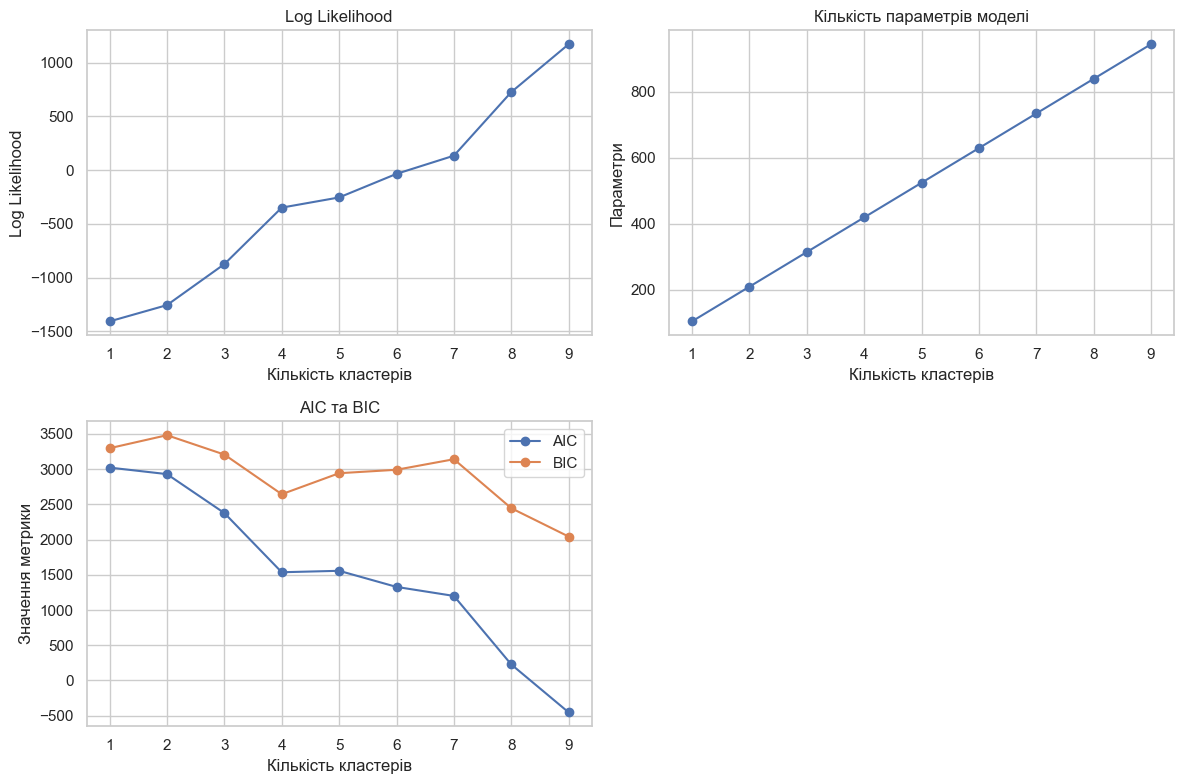

In [ ]:
n_components_range = range(1, 10)
# Створимо списки для збереження результатів
log_likelihoods = []
n_parameters = []
aic = []
bic = []

# Проганяємо GMM для різної кількості кластерів
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data_scaled)
    log_likelihoods.append(gmm.score(data_scaled) * len(data_scaled))
    n_parameters.append(gmm._n_parameters())
    aic.append(gmm.aic(data_scaled))
    bic.append(gmm.bic(data_scaled))

# Побудова графіків для візуалізації
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('Log Likelihood')
plt.xlabel('Кількість кластерів')
plt.ylabel('Log Likelihood')

plt.subplot(2, 2, 2)
plt.plot(n_components_range, n_parameters, marker='o')
plt.title('Кількість параметрів моделі')
plt.xlabel('Кількість кластерів')
plt.ylabel('Параметри')

plt.subplot(2, 2, 3)
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.title('AIC та BIC')
plt.xlabel('Кількість кластерів')
plt.ylabel('Значення метрики')
plt.legend()

plt.tight_layout()

plt.show()

#### &#10140; *DBSCAN*</br>

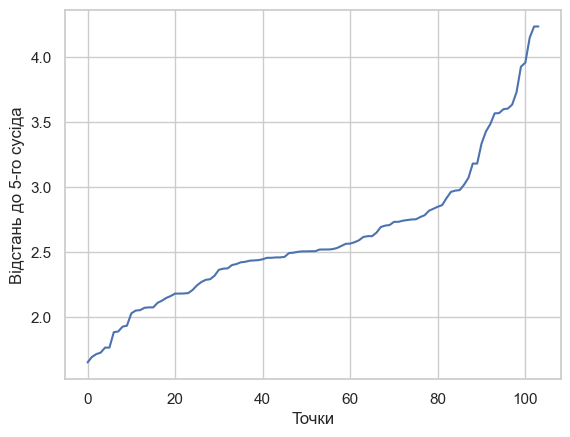

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)

# Сортуємо відстані
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Відстань до 5-го сусіда')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_score_dbscan = -1
best_eps = None
best_min_samples = None

eps_values = np.arange(2.0, 2.5, 0.1)
min_samples_values = range(3, 11)

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(data_scaled)
        
        unique_labels = set(labels)
        
        if len(unique_labels - {-1}) >= 2:
            score = silhouette_score(data_scaled[labels != -1], labels[labels != -1])
            
            if score > best_score_dbscan:
                best_score_dbscan = score
                best_eps = eps
                best_min_samples = min_s

print(f'Найкращі параметри:')
print(f'eps = {best_eps}')
print(f'min_samples = {best_min_samples}')
print(f'Silhouette Score = {best_score_dbscan:.4f}')


Найкращі параметри:
eps = 2.1
min_samples = 9
Silhouette Score = 0.6284


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(data_scaled)


##### Silhouette Score без шуму

In [ ]:
from sklearn.metrics import silhouette_score

# Маска для точок, які не є шумом
mask = labels != -1
sil_score_wo_noise = silhouette_score(data_scaled[mask], labels[mask])
print(f'Silhouette Score без шуму: {sil_score_wo_noise:.4f}')


Silhouette Score без шуму: 0.6284


##### Silhouette Score зі шумом

In [ ]:
sil_score_with_noise = silhouette_score(data_scaled, labels)
print(f'Silhouette Score зі шумом: {sil_score_with_noise:.4f}')

Silhouette Score зі шумом: -0.0711


#### <div class="alert alert-info"> **Висновок: DBSCAN є дуже зручною і доречною моделлю, бо він відкидає точки, що вважає шумом і тим самим покращує наші метрики і свою роботу також.** </div>

---

## <Center> **Зменшення розмірності за допомогою PCA (до 2-3 компонент)** </Center> 

#### &#10140; *Застосування PCA*</br>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

print(f'Відсоток поясненої варіації: {pca.explained_variance_ratio_}')
print(f'Сумарно пояснюють: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

Відсоток поясненої варіації: [0.34334242 0.25967015 0.09341964]
Сумарно пояснюють: 69.64%


#### &#10140; *Повторна кластеризація*</br>

In [ ]:
# Візуалізація KMEANS
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(data_pca)
centroids_pca = kmeans_pca.cluster_centers_

sil_score_pca_kmeans = silhouette_score(data_pca, labels_pca)
db_score_pca_kmeans = davies_bouldin_score(data_pca, labels_pca)
ch_score_pca_kmeans = calinski_harabasz_score(data_pca, labels_pca)

print("Розподіл об'єктів за кластерами:")
print(f"Silhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans:.3f}")

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f"Silhouette Score: {sil_score_pca_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_pca_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_pca_kmeans:.3f}")

Розподіл об'єктів за кластерами:
Silhouette Score: 0.267
Davies-Bouldin Index: 1.521
Calinski-Harabasz Index: 38.577

Розподіл об'єктів за кластерами (PCA):
Silhouette Score: 0.402
Davies-Bouldin Index: 1.092
Calinski-Harabasz Index: 66.088


In [ ]:
# Візуалізація FUZZY CMEANS
n_clusters = 2
X = data_pca.T
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None, seed=42
)
labels_hard = np.argmax(u, axis=0)
X_normal = X.T

def xie_beni_index(X, u, centers, m):
    N = X.shape[0]
    c = centers.shape[0]
    num = 0
    for i in range(c):
        for j in range(N):
            num += (u[i, j] ** m) * np.linalg.norm(X[j] - centers[i]) ** 2
    min_dist = np.min([
        np.linalg.norm(centers[i] - centers[k]) ** 2
        for i in range(c) for k in range(c) if i != k
    ])
    return num / (N * min_dist)

cluster_labels = np.argmax(fuzzy_membership_matrix, axis=1)
sil_score_pca_fuzzy = silhouette_score(X_normal, labels_hard)
xie_beni_pca_fuzzy = xie_beni_index(X_normal, u, cntr, m=2)

print("Розподіл об'єктів за кластерами:")
print(f"Silhouette Score: {sil_score_fuzzy:.3f}")
print(f"Xie Beni index: {xie_beni_fuzzy:.3f}")
print(f"Fuzzy Partition Coefficient: {fpc:.3f}")

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f"Silhouette Score: {sil_score_pca_fuzzy:.3f}")
print(f"Xie Beni index: {xie_beni_pca_fuzzy:.3f}")
print(f"Fuzzy Partition Coefficient: {fpc:.3f}")

Розподіл об'єктів за кластерами:
Silhouette Score: 0.247
Xie Beni index: 0.814
Fuzzy Partition Coefficient: 0.713

Розподіл об'єктів за кластерами (PCA):
Silhouette Score: 0.394
Xie Beni index: 0.318
Fuzzy Partition Coefficient: 0.713


In [ ]:
# Візуалізація GMM
gmm_pca = GaussianMixture(n_components=4, random_state=42)
gmm_pca.fit(data_pca)
labels_gmm_pca = gmm_pca.predict(data_pca)
probs = gmm_pca.predict_proba(data_pca)

pd.DataFrame(probs[:5])

labels = np.argmax(probs, axis=1)
sil_score_pca_gmm = silhouette_score(data_pca, labels)

print("Розподіл об'єктів за кластерами:")
print(f'Silhouette Score: {sil_score_gmm:.4f}')

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f'Silhouette Score: {sil_score_pca_gmm:.4f}')

Розподіл об'єктів за кластерами:
Silhouette Score: 0.1721

Розподіл об'єктів за кластерами (PCA):
Silhouette Score: 0.2863


In [ ]:
# Візуалізація DBSCAN
best_score_pca_dbscan = -1
best_eps = None
best_min_samples = None

eps_values = np.arange(0.5, 2.0, 0.1)
min_samples_values = range(3, 11)
for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(data_pca)
        
        unique_labels = set(labels)
        
        if len(unique_labels - {-1}) >= 2:
            score = silhouette_score(data_pca[labels != -1], labels[labels != -1])
            
            if score > best_score_pca_dbscan:
                best_score_pca_dbscan = score
                best_eps = eps
                best_min_samples = min_s

print("Розподіл об'єктів за кластерами:")
print(f'Silhouette Score = {best_score_dbscan:.4f}')

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f'Silhouette Score = {best_score_pca_dbscan:.4f}')

Розподіл об'єктів за кластерами:
Silhouette Score = 0.6284

Розподіл об'єктів за кластерами (PCA):
Silhouette Score = 0.8306


---

## <Center> **Зменшення розмірності за допомогою PCA (до 4-5 компонент)** </Center> 

#### &#10140; *Розширене зменшення розмірності*</br>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_pca5 = pca.fit_transform(data_scaled)

print(f'Відсоток поясненої варіації: {pca.explained_variance_ratio_}')
print(f'Сумарно пояснюють: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

print("\nВідсоток поясненої варіації для 3 компонент був: 69,64%")

Відсоток поясненої варіації: [0.34334242 0.25967015 0.09341964 0.07184337 0.06011155]
Сумарно пояснюють: 82.84%

Відсоток поясненої варіації для 3 компонент був: 69,64%


#### &#10140; *Повторна кластеризація*</br>

In [ ]:
# Візуалізація KMEANS
kmeans_pca5 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_pca5 = kmeans_pca5.fit_predict(data_pca5)
centroids_pca5 = kmeans_pca5.cluster_centers_

sil_score_pca5_kmeans = silhouette_score(data_pca5, labels_pca5)
db_score_pca5_kmeans = davies_bouldin_score(data_pca5, labels_pca5)
ch_score_pca5_kmeans = calinski_harabasz_score(data_pca5, labels_pca5)

print("Розподіл об'єктів за кластерами:")
print(f"Silhouette Score: {sil_score_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_kmeans:.3f}")

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f"Silhouette Score: {sil_score_pca_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_pca_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_pca_kmeans:.3f}")

print("\nРозподіл об'єктів за кластерами (PCA - 5 компонент):")
print(f"Silhouette Score: {sil_score_pca5_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_score_pca5_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_pca5_kmeans:.3f}")

Розподіл об'єктів за кластерами:
Silhouette Score: 0.267
Davies-Bouldin Index: 1.521
Calinski-Harabasz Index: 38.577

Розподіл об'єктів за кластерами (PCA):
Silhouette Score: 0.402
Davies-Bouldin Index: 1.092
Calinski-Harabasz Index: 66.088

Розподіл об'єктів за кластерами (PCA - 5 компонент):
Silhouette Score: 0.329
Davies-Bouldin Index: 1.294
Calinski-Harabasz Index: 50.421


In [ ]:
# Візуалізація FUZZY CMEANS
n_clusters = 2
X = data_pca5.T
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None, seed=42
)
labels_hard = np.argmax(u, axis=0)
X_normal = X.T

def xie_beni_index(X, u, centers, m):
    N = X.shape[0]
    c = centers.shape[0]
    num = 0
    for i in range(c):
        for j in range(N):
            num += (u[i, j] ** m) * np.linalg.norm(X[j] - centers[i]) ** 2
    min_dist = np.min([
        np.linalg.norm(centers[i] - centers[k]) ** 2
        for i in range(c) for k in range(c) if i != k
    ])
    return num / (N * min_dist)

cluster_labels = np.argmax(fuzzy_membership_matrix, axis=1)
sil_score_pca5_fuzzy = silhouette_score(X_normal, labels_hard)
xie_beni_pca5_fuzzy = xie_beni_index(X_normal, u, cntr, m=2)

print("Розподіл об'єктів за кластерами:")
print(f"Silhouette Score: {sil_score_fuzzy:.3f}")
print(f"Xie Beni index: {xie_beni_fuzzy:.3f}")
print(f"Fuzzy Partition Coefficient: {fpc:.3f}")

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f"Silhouette Score: {sil_score_pca_fuzzy:.3f}")
print(f"Xie Beni index: {xie_beni_pca_fuzzy:.3f}")
print(f"Fuzzy Partition Coefficient: {fpc:.3f}")

print("\nРозподіл об'єктів за кластерами (PCA - 5 компонент):")
print(f"Silhouette Score: {sil_score_pca5_fuzzy:.3f}")
print(f"Xie Beni index: {xie_beni_pca5_fuzzy:.3f}")
print(f"Fuzzy Partition Coefficient: {fpc:.3f}")

Розподіл об'єктів за кластерами:
Silhouette Score: 0.247
Xie Beni index: 0.814
Fuzzy Partition Coefficient: 0.653

Розподіл об'єктів за кластерами (PCA):
Silhouette Score: 0.394
Xie Beni index: 0.318
Fuzzy Partition Coefficient: 0.653

Розподіл об'єктів за кластерами (PCA - 5 компонент):
Silhouette Score: 0.316
Xie Beni index: 0.473
Fuzzy Partition Coefficient: 0.653


In [ ]:
# Візуалізація GMM
gmm_pca5 = GaussianMixture(n_components=4, random_state=42)
gmm_pca5.fit(data_pca5)
labels_gmm_pca5 = gmm_pca5.predict(data_pca5)
probs = gmm_pca5.predict_proba(data_pca5)

pd.DataFrame(probs[:5])

labels = np.argmax(probs, axis=1)
sil_score_pca5_gmm = silhouette_score(data_pca5, labels)

print("Розподіл об'єктів за кластерами:")
print(f'Silhouette Score: {sil_score_gmm:.4f}')

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f'Silhouette Score: {sil_score_pca_gmm:.4f}')

print("\nРозподіл об'єктів за кластерами (PCA - 5 компонент):")
print(f'Silhouette Score: {sil_score_pca5_gmm:.4f}')

Розподіл об'єктів за кластерами:
Silhouette Score: 0.1721

Розподіл об'єктів за кластерами (PCA):
Silhouette Score: 0.2863

Розподіл об'єктів за кластерами (PCA - 5 компонент):
Silhouette Score: 0.2036


In [ ]:
# Візуалізація DBSCAN
best_score_pca5_dbscan = -1
best_eps = None
best_min_samples = None

eps_values = np.arange(0.5, 2.0, 0.1)
min_samples_values = range(3, 11)
for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(data_pca5)
        
        unique_labels = set(labels)
        
        if len(unique_labels - {-1}) >= 2:
            score = silhouette_score(data_pca5[labels != -1], labels[labels != -1])
            
            if score > best_score_pca5_dbscan:
                best_score_pca5_dbscan = score
                best_eps = eps
                best_min_samples = min_s

print("Розподіл об'єктів за кластерами:")
print(f'Silhouette Score = {best_score_dbscan:.4f}')

print("\nРозподіл об'єктів за кластерами (PCA):")
print(f'Silhouette Score = {best_score_pca_dbscan:.4f}')

print("\nРозподіл об'єктів за кластерами (PCA - 5 компонент):")
print(f'Silhouette Score = {best_score_pca5_dbscan:.4f}')

Розподіл об'єктів за кластерами:
Silhouette Score = 0.6284

Розподіл об'єктів за кластерами (PCA):
Silhouette Score = 0.8306

Розподіл об'єктів за кластерами (PCA - 5 компонент):
Silhouette Score = 0.8040


---

## <Center> **Візуалізація результатів** </Center> 

#### &#10140; *Графічне порівняння*</br>

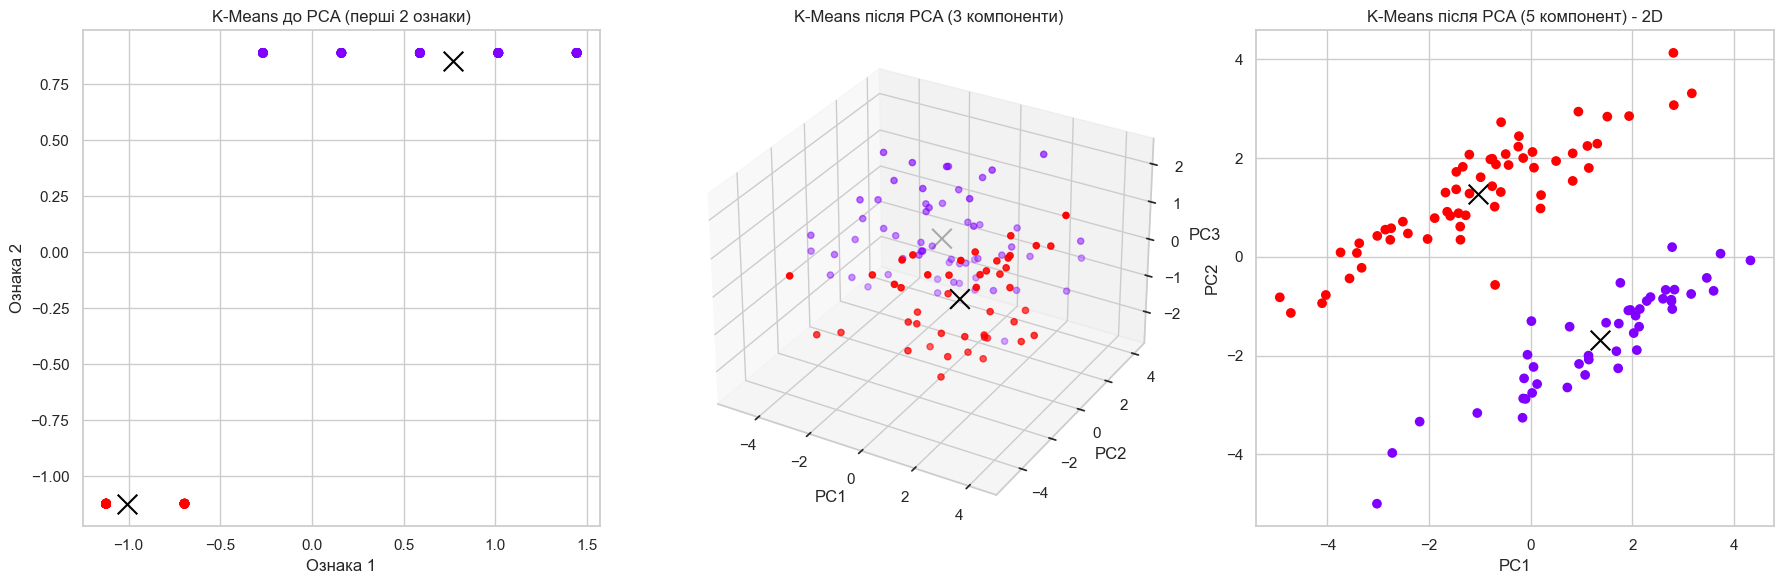

In [ ]:
# Візуалізація KMEANS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 6))

# Ліва частина - До PCA
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=labels_original, cmap='rainbow')
ax1.scatter(centroids_original[:, 0], centroids_original[:, 1], marker='x', s=200, c='black')
ax1.set_title('K-Means до PCA (перші 2 ознаки)')
ax1.set_xlabel('Ознака 1')
ax1.set_ylabel('Ознака 2')
ax1.grid(True)

# Середина - Після PCA (3 компоненти)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels_pca, cmap='rainbow')
ax2.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], marker='x', s=200, c='black')
ax2.set_title('K-Means після PCA (3 компоненти)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# Права частина - Після PCA (5 компонент) — 2D
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(data_pca5[:, 0], data_pca5[:, 1], c=labels_pca5, cmap='rainbow')
ax3.scatter(centroids_pca5[:, 0], centroids_pca5[:, 1], marker='x', s=200, c='black')
ax3.set_title('K-Means після PCA (5 компонент) - 2D')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.grid(True)

plt.tight_layout()
plt.show()


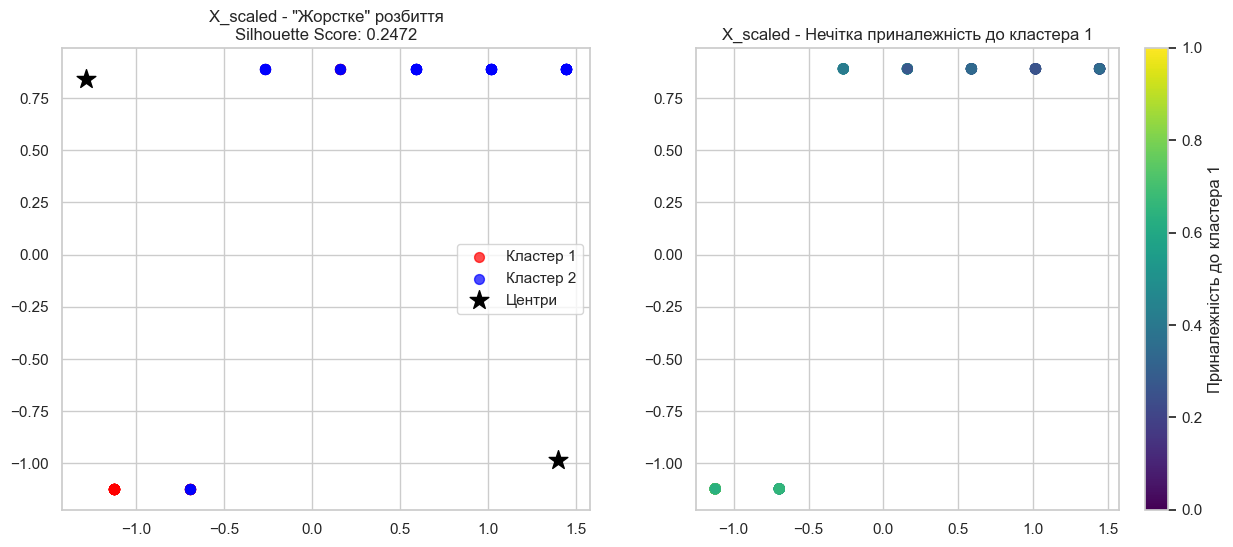

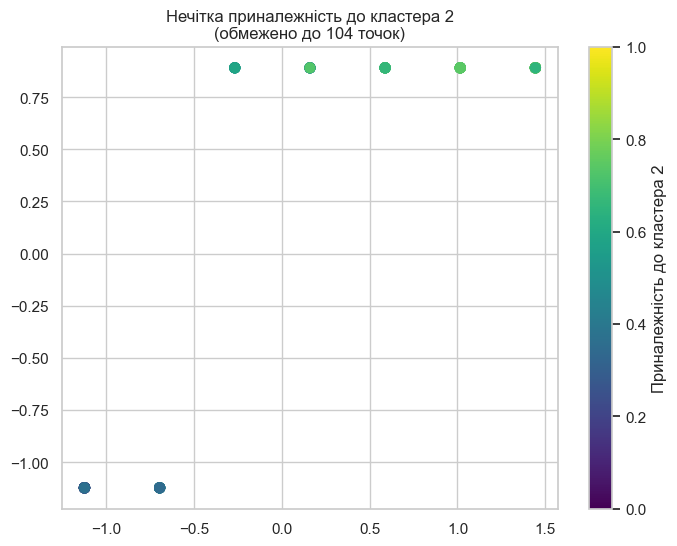

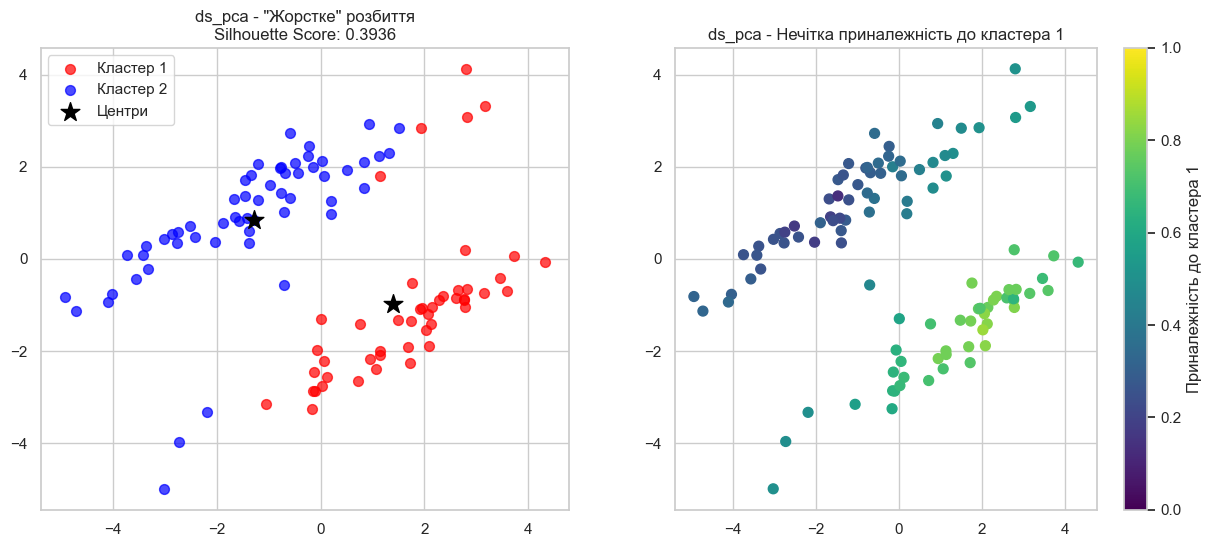

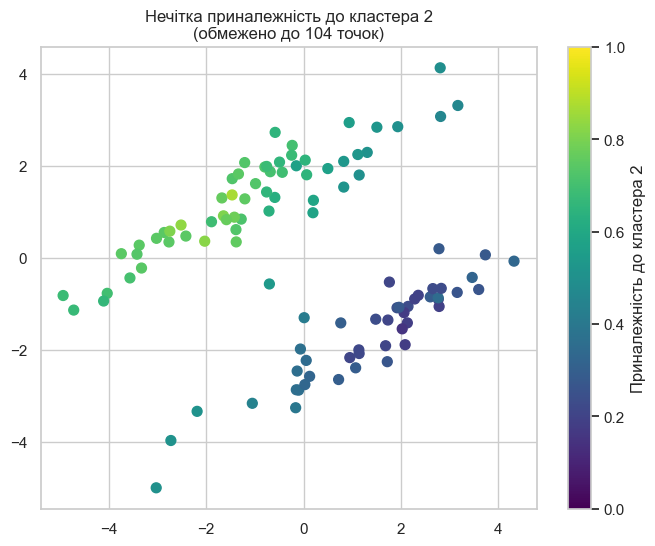

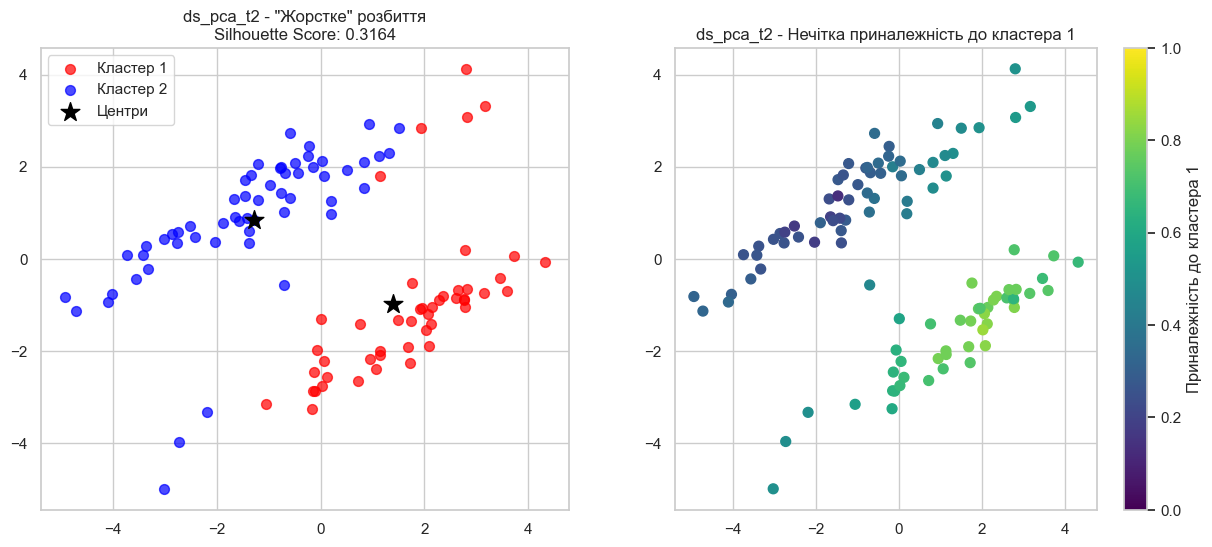

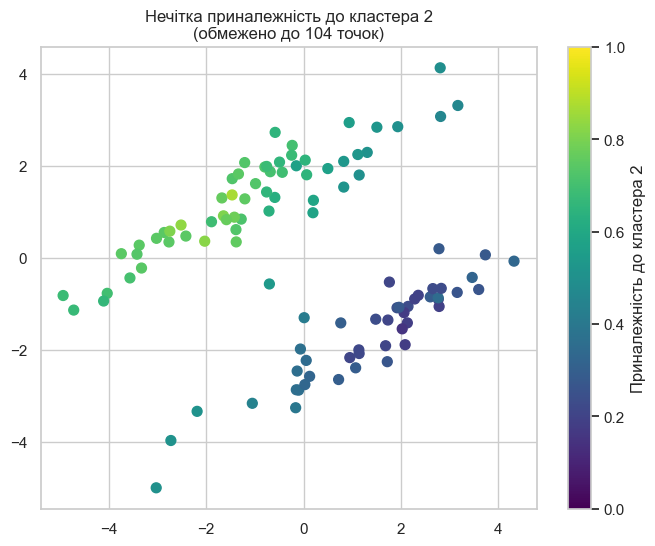

In [ ]:
# Візуалізація FUZZY CMEANS
datasets = {
    "X_scaled": (data_scaled.values, sil_score_fuzzy),
    "ds_pca": (data_pca, sil_score_pca_fuzzy),
    "ds_pca_t2": (data_pca5, sil_score_pca5_fuzzy)
}

max_points = 15000

for name, (data, silhouette_score) in datasets.items():
    if data.shape[1] >= 2:
        if data.shape[0] > max_points:
            viz_indices = np.random.choice(data.shape[0], max_points, replace=False)
            data_viz = data[viz_indices]
            labels_viz = cluster_labels[viz_indices]
            membership_viz = fuzzy_membership_matrix[viz_indices]
        else:
            data_viz = data
            labels_viz = cluster_labels
            membership_viz = fuzzy_membership_matrix

        plt.figure(figsize=(15, 6))
        
        # Графік "жорсткої" кластеризації
        plt.subplot(1, 2, 1)
        colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
        for i in range(n_clusters):
            plt.scatter(data_viz[labels_viz == i, 0], data_viz[labels_viz == i, 1],
                        s=50, c=colors[i % len(colors)], label=f'Кластер {i+1}', alpha=0.7)
        plt.scatter(cntr[:, 0], cntr[:, 1], s=200, c='black', marker='*', label='Центри')
        plt.title(f'{name} - "Жорстке" розбиття\nSilhouette Score: {silhouette_score:.4f}')
        plt.grid(True)
        plt.legend()

        # Графік нечіткої приналежності до 1 кластеру
        plt.subplot(1, 2, 2)
        scatter = plt.scatter(data_viz[:, 0], data_viz[:, 1], c=membership_viz[:, 0],
                              s=50, cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(scatter, label='Приналежність до кластера 1')
        plt.title(f'{name} - Нечітка приналежність до кластера 1')
        plt.grid(True)
        plt.show()

    # Додаткові графіки для інших кластерів
    for i in range(1, n_clusters):
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(data_viz[:, 0], data_viz[:, 1], c=membership_viz[:, i], 
                s=50, cmap='viridis', vmin=0, vmax=1)
        plt.colorbar(scatter, label=f'Приналежність до кластера {i+1}')
        plt.title(f'Нечітка приналежність до кластера {i+1}\n(обмежено до {len(data_viz)} точок)')
        plt.grid(True)
        plt.show()

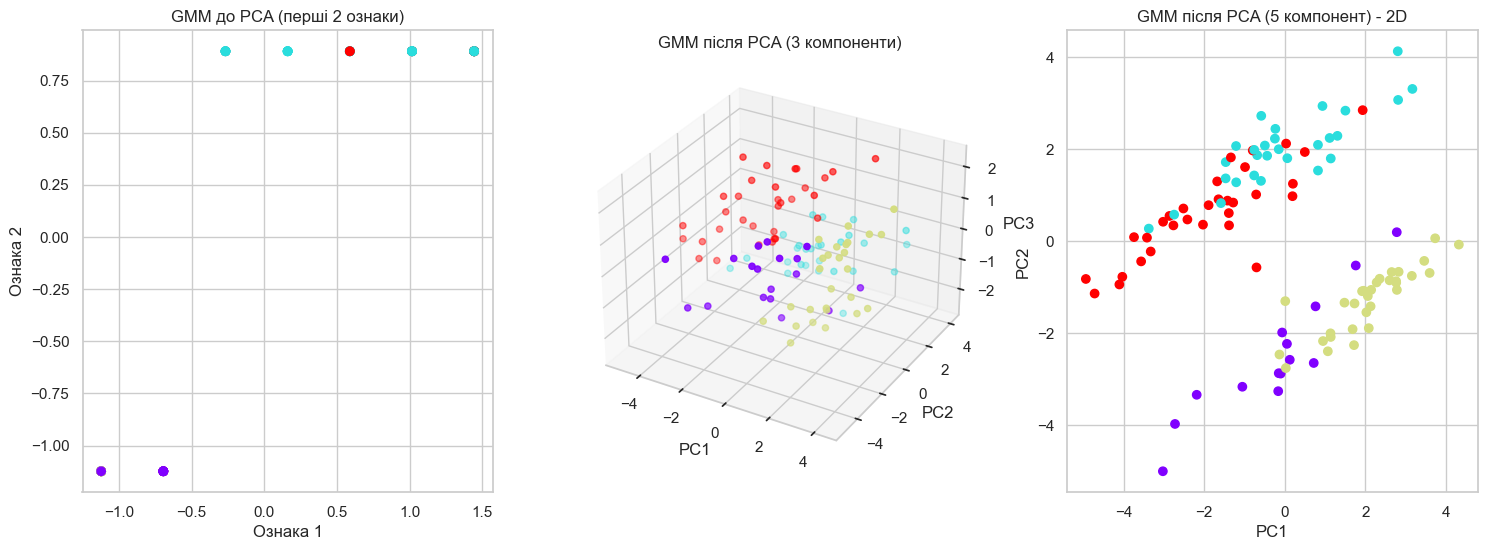

In [ ]:
# Візуалізація GMM
fig = plt.figure(figsize=(18, 6))

# До PCA (2D)
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=labels_gmm_original, cmap='rainbow')
ax1.set_title('GMM до PCA (перші 2 ознаки)')
ax1.set_xlabel('Ознака 1')
ax1.set_ylabel('Ознака 2')
ax1.grid(True)

# Після PCA (3 компоненти)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels_gmm_pca, cmap='rainbow')
ax2.set_title('GMM після PCA (3 компоненти)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# Після PCA (5 компонент) — 2D
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(data_pca5[:, 0], data_pca5[:, 1], c=labels_gmm_pca5, cmap='rainbow')
ax3.set_title('GMM після PCA (5 компонент) - 2D')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.grid(True)

---

## <Center> **Аналіз та висновки** </Center> 

#### &#10140; *Порівняння показників*</br>

In [ ]:
from IPython.display import display

# Таблиця для KMeans
kmeans_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "Без PCA": [sil_score_kmeans, db_score_kmeans, ch_score_kmeans],
    "PCA (2-3 компоненти)": [sil_score_pca_kmeans, db_score_pca_kmeans, ch_score_pca_kmeans],
    "PCA (4-5 компонентів)": [sil_score_pca5_kmeans, db_score_pca5_kmeans, ch_score_pca5_kmeans]
})

# Таблиця для Fuzzy C-Means
fuzzy_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score", "Xie-Beni Index"],
    "Без PCA": [sil_score_fuzzy, xie_beni_fuzzy],
    "PCA (2-3 компоненти)": [sil_score_pca_fuzzy, xie_beni_pca_fuzzy],
    "PCA (4-5 компонентів)": [sil_score_pca5_fuzzy, xie_beni_pca5_fuzzy]
})

# Таблиця для GMM
gmm_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score"],
    "Без PCA": [sil_score_gmm],
    "PCA (2-3 компоненти)": [sil_score_pca_gmm],
    "PCA (4-5 компонентів)": [sil_score_pca5_gmm]
})

#Таблиця для DBSCAN
dbscan_metrics = pd.DataFrame({
    "Метрика": ["Silhouette Score"],
    "Без PCA": [best_score_dbscan],
    "PCA (2-3 компоненти)": [db_score_pca_kmeans],
    "PCA (4-5 компонентів)": [db_score_pca5_kmeans]
})

print("Метрики для KMeans:")
display(kmeans_metrics)

print("\nМетрики для Fuzzy C-Means:")
display(fuzzy_metrics)

print("\nМетрики для GMM:")
display(gmm_metrics)

print("\nМетрики для DBSCAN:")
display(dbscan_metrics)

Метрики для KMeans:


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.266532,0.401575,0.328512
1,Davies-Bouldin Index,1.520653,1.091515,1.294109
2,Calinski-Harabasz Index,38.576911,66.087873,50.421452



Метрики для Fuzzy C-Means:


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.247212,0.393591,0.316386
1,Xie-Beni Index,0.813776,0.317879,0.473308



Метрики для GMM:


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.172138,0.286313,0.203595



Метрики для DBSCAN:


,Метрика,Без PCA,PCA (2-3 компоненти),PCA (4-5 компонентів)
0,Silhouette Score,0.628387,1.091515,1.294109


#### &#10140; *Обговорення впливу PCA*</br>

#### Як PCA вплинуло на якість кластеризації:
##### Застосування PCA дозволило зменшити розмірність простору ознак та зберегти основну інформацію про структуру даних. Після зменшення розмірності до 2-3 компонент якість кластеризації покращилась — це підтверджується зростанням метрики Silhouette Score та більш чіткою візуальною сегментацією об'єктів на графіках. PCA допомогло зменшити "шумові" ознаки та уникнути проблеми високої розмірності.

#### Чому кількість компонент впливає на результат (2-3 vs 4-5 компонент):
##### При виборі малої кількості компонент (2-3) PCA максимально стискає інформацію у новий простір, але частина слабких ознак може втратитись. Це часто допомагає краще виділити загальні закономірності та покращити кластеризацію. Якщо вибрати більшу кількість компонент (4-5), то простір буде ближчим до початкового. Це дозволяє зберегти більше деталей, але інколи може призводити до гіршої кластеризації через повернення частини "зайвого" шуму.

#### &#10140; *Переваги та недоліки алгоритмів*</br>

##### K-Means є одним із найпростіших та найшвидших алгоритмів кластеризації, проте він чутливий до вибору кількості кластерів та початкових центроїдів. Fuzzy C-Means дозволяє кожному об’єкту частково належати до кількох кластерів, що робить його гнучкішим, але він також потребує заданої кількості кластерів та чутливий до параметра нечіткості. Gaussian Mixture Model (GMM) будує кластери з урахуванням ймовірностей, що дозволяє моделювати складнішу форму кластерів, однак він може погано працювати при наявності сильного шуму в даних та вимагає вказання кількості кластерів. Алгоритм DBSCAN не потребує задання кількості кластерів, автоматично визначає шуми, але є дуже чутливим до параметрів eps та min_samples. При цьому DBSCAN добре працює для кластерів довільної форми, проте важко налаштовується при нерівномірній щільності даних. Загалом вибір алгоритму кластеризації залежить від специфіки даних та поставленої задачі.

#### &#10140; *Загальний висновок*</br>

##### Найкращим алгоритмом кластеризації для даного набору даних виявився DBSCAN, оскільки він продемонстрував найвищі значення метрики Silhouette Score навіть без застосування PCA. Це пояснюється тим, що DBSCAN добре працює з даними, які мають складну структуру та наявність шумових об’єктів. Важливою перевагою цього алгоритму стало те, що він не потребує задання кількості кластерів заздалегідь, а самостійно визначає як кластери, так і шумові точки. Водночас застосування PCA допомогло покращити якість кластеризації для більшості моделей, особливо при зменшенні розмірності до 2-3 компонент, оскільки це дозволило зберегти основну інформацію та прибрати зайвий шум. Значний вплив на результати мала висока розмірність даних, що ускладнювала роботу алгоритмів, які чутливі до багатовимірності. Крім того, структура даних була досить складною та включала як чітко виражені групи, так і шумові об’єкти, що ускладнювало роботу алгоритмів на вихідному просторі. Саме тому поєднання зменшення розмірності та використання DBSCAN дало найкращі результати у даній лабораторній роботі.

---